<a href="https://colab.research.google.com/github/uzair011/CN5021--practical/blob/main/Embedding_Model_Building_CN5021_small_Quiz4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Libraries and Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Importing the relevant libraries

import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings



from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DTC

col_Features = ['DLength', 'DHaveDigits', 'DAllDigits', 'DHaveHyphen',
                  'DFirstDigit','DLastDigit', 'DVowelRatio', 'DConsonantRatio' ]




In [2]:

data = pd.read_csv('/content/small_test_data_10K.csv')

dist = data.category.value_counts().to_frame().reset_index()
dist['% distribution'] = data.category.value_counts().values/data.shape[0] * 100
dist.columns = ['categories', 'count', '% distribution']
dist

,categories,count,% distribution
0,1,6000,60.0
1,2,2000,20.0
2,3,1000,10.0
3,4,500,5.0
4,5,500,5.0


There appears to be an imbalance in the data

## **Feature Extraction**

In [3]:
# Extracting the domain name


data['DName'] = data['Domain'].apply(lambda x: x.split('.')[0].lower())

# Counting the number of characters in the domain name
data['DLength'] = data['DName'].apply(lambda x: len(x))

# Are there digits in the domain name
data['DHaveDigits'] = data['DName'].apply(lambda x: 0 if len(re.findall('\d', x)) == 0 else 1)
data['DAllDigits'] = data.apply(lambda x: 1 if len(re.findall('\d', x['DName'])) == x['DLength'] else 0, axis = 1)

####################################
# Assignment (20 marks)
####################################

# Are there hyphens in the domain name
data['DHaveHyphen'] = data['DName'].apply(lambda x: 1 if '-' in x else 1)

# Checking if the first character of the domain name is an alphabet or digit: 1 if digit, 0 if alphabet
data['DFirstDigit'] = data['DName'].apply(lambda x: 1 if x[0].isdigit() else 0)

# Checking if the last character of the domain name is an alphabet or digit: 1 if digit, 0 if alphabet
data['DLastDigit'] = data['DName'].apply(lambda x: 1 if x[-1].isdigit() else 0)

# Compute the ratio of vowels to total alphabets (reflects pronouncability)
data['DVowelRatio'] = data['DName'].apply(lambda x: len(re.findall("[aeiou]", x))/ len(re.findall("[a-z]",x)) if len(re.findall("[a-z]", x)) > 0 else 0)

# Compute the ratio of consonants to total alphabets
data['DConsonantRatio'] = data['DName'].apply(lambda x: len(re.findall("[bcdfghjklmnpqrstvwxyz]", x))/ len(re.findall("[a-z]", x)) if len(re.findall("a-z", x)) > 0 else 0 )




In [4]:
data.tail(20)

,Domain,category,DName,DLength,DHaveDigits,DAllDigits,DHaveHyphen,DFirstDigit,DLastDigit,DVowelRatio,DConsonantRatio
9980,lovelovelove.com,5,lovelovelove,12,0,0,1,0,0,0.500000,0
9981,tennisracket.com,5,tennisracket,12,0,0,1,0,0,0.333333,0
9982,yogalicious.com,5,yogalicious,11,0,0,1,0,0,0.545455,0
9983,global-1.com,5,global-1,8,1,0,1,0,1,0.333333,0
9984,workoutsupplements.com,5,workoutsupplements,18,0,0,1,0,0,0.333333,0
9985,mybridge.com,5,mybridge,8,0,0,1,0,0,0.250000,0
9986,printprice.com,5,printprice,10,0,0,1,0,0,0.300000,0
9987,freeonlinecasinos.com,5,freeonlinecasinos,17,0,0,1,0,0,0.470588,0
9988,raylee.com,5,raylee,6,0,0,1,0,0,0.500000,0
9989,nutricosmetics.com,5,nutricosmetics,14,0,0,1,0,0,0.357143,0


## **Data Exploration**

Text(0.5, 1.0, 'Distribution of Price Rankings of the domain names')

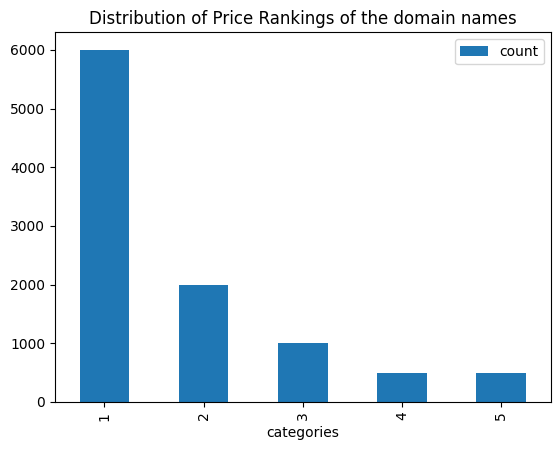

In [5]:
#sns.set_theme(style="whitegrid", palette="pastel")
dist.plot('categories', 'count', kind = 'bar')
plt.title('Distribution of Price Rankings of the domain names')


Text(0.5, 1.0, 'Boxplot of Domain Name Lengths')

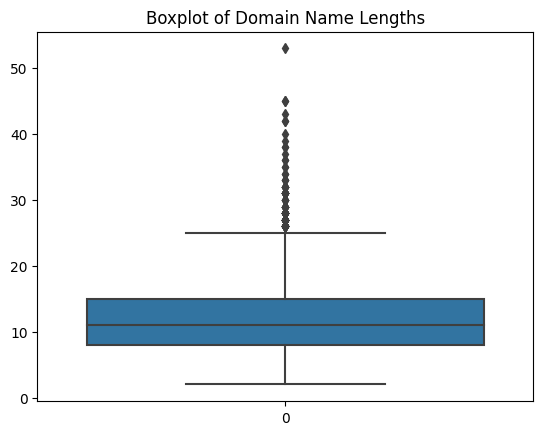

In [6]:
sns.boxplot(data['DLength'])
plt.title('Boxplot of Domain Name Lengths')

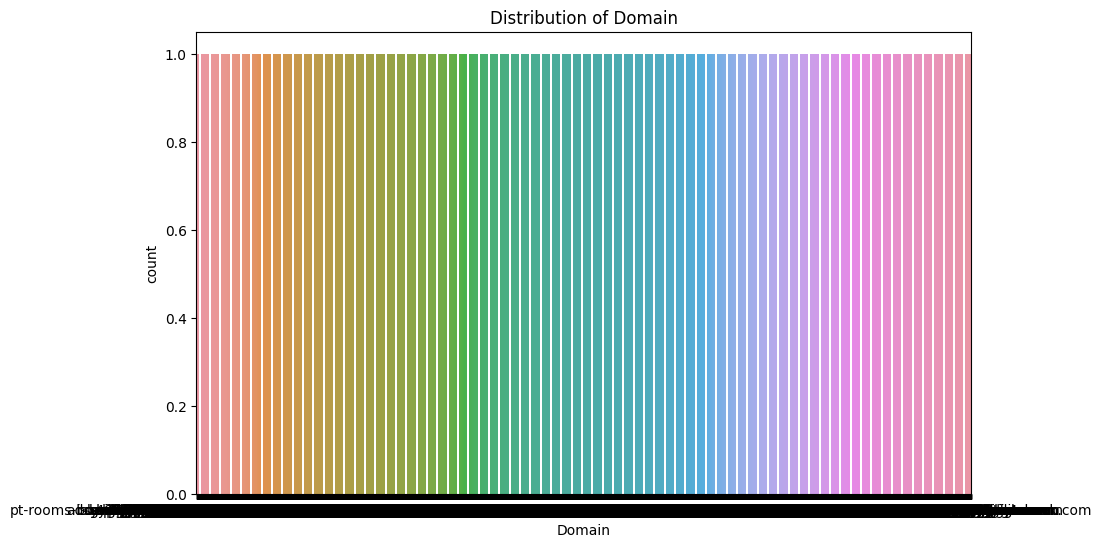

Value Counts for Domain:
noriomatsumoto.com              1
digitalmarketingbusiness.com    1
toneflex.com                    1
vocify.com                      1
custsupport.com                 1
                               ..
terraintegrationservices.com    1
livergea.com                    1
rawglowingskincare.com          1
bloggingking07.com              1
stemz.com                       1
Name: Domain, Length: 10000, dtype: int64



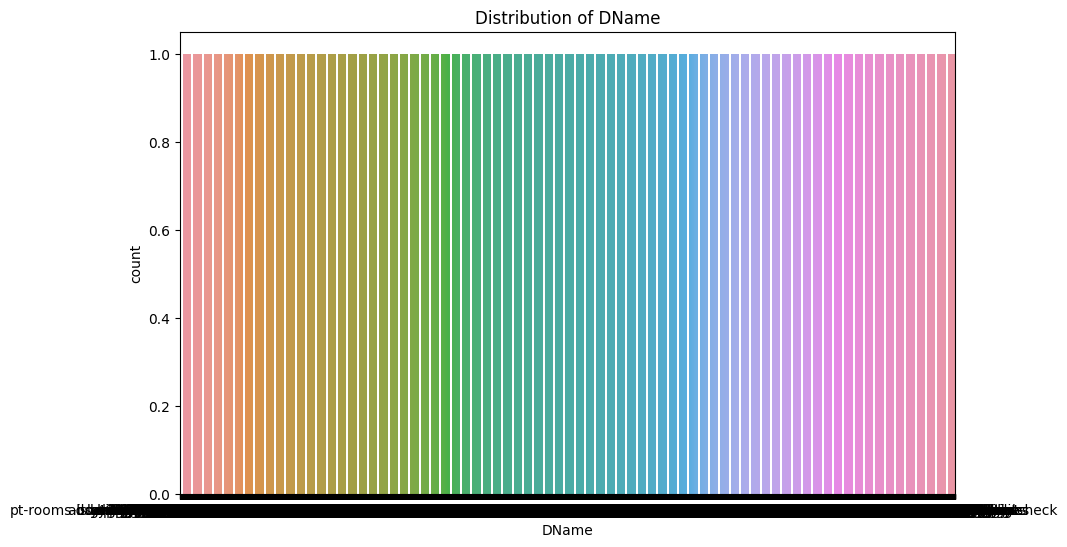

Value Counts for DName:
noriomatsumoto              1
digitalmarketingbusiness    1
toneflex                    1
vocify                      1
custsupport                 1
                           ..
terraintegrationservices    1
livergea                    1
rawglowingskincare          1
bloggingking07              1
stemz                       1
Name: DName, Length: 10000, dtype: int64



In [7]:

#sns.countplot(data = data, x = 'category')
#plt.title('Distribution of %s' %1)
#plt.show()
#print(data.value_counts()/data.shape[0]*100)

#############################################
# Show Countplot for all features (5 marks)
#############################################

# for column in data.columns:
#   if data[column].dtype == "object":
#     plt.figure(figsize=(10, 6))
#     sns.countplot(data = data, x = column)
#     plt.title(f"Distribution of {column}")
#     plt.show()

# print(data.value_counts()/data.shape[0]*100)


for column in data.columns:
    if data[column].dtype == "object":
        plt.figure(figsize=(10, 6))
        sns.countplot(data=data, x=column)
        plt.title(f"Distribution of {column}")
        plt.show()
        print(f"Value Counts for {column}:\n{data[column].value_counts()}\n")

Text(0.5, 1.0, 'Distribution of Domain Name Lengths across the respective categories')

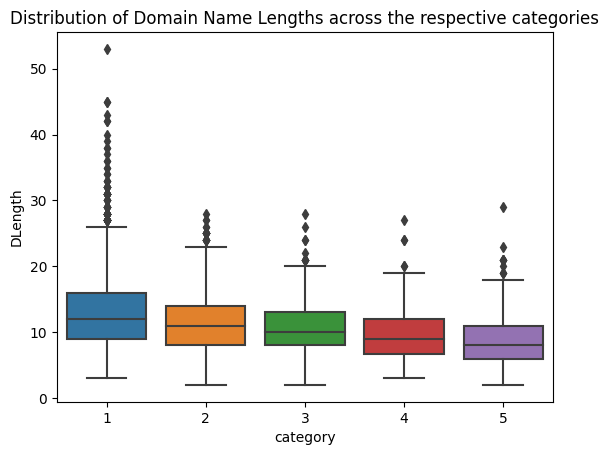

In [8]:

sns.boxplot(data=data, x='category', y='DLength')
plt.title('Distribution of Domain Name Lengths across the respective categories')

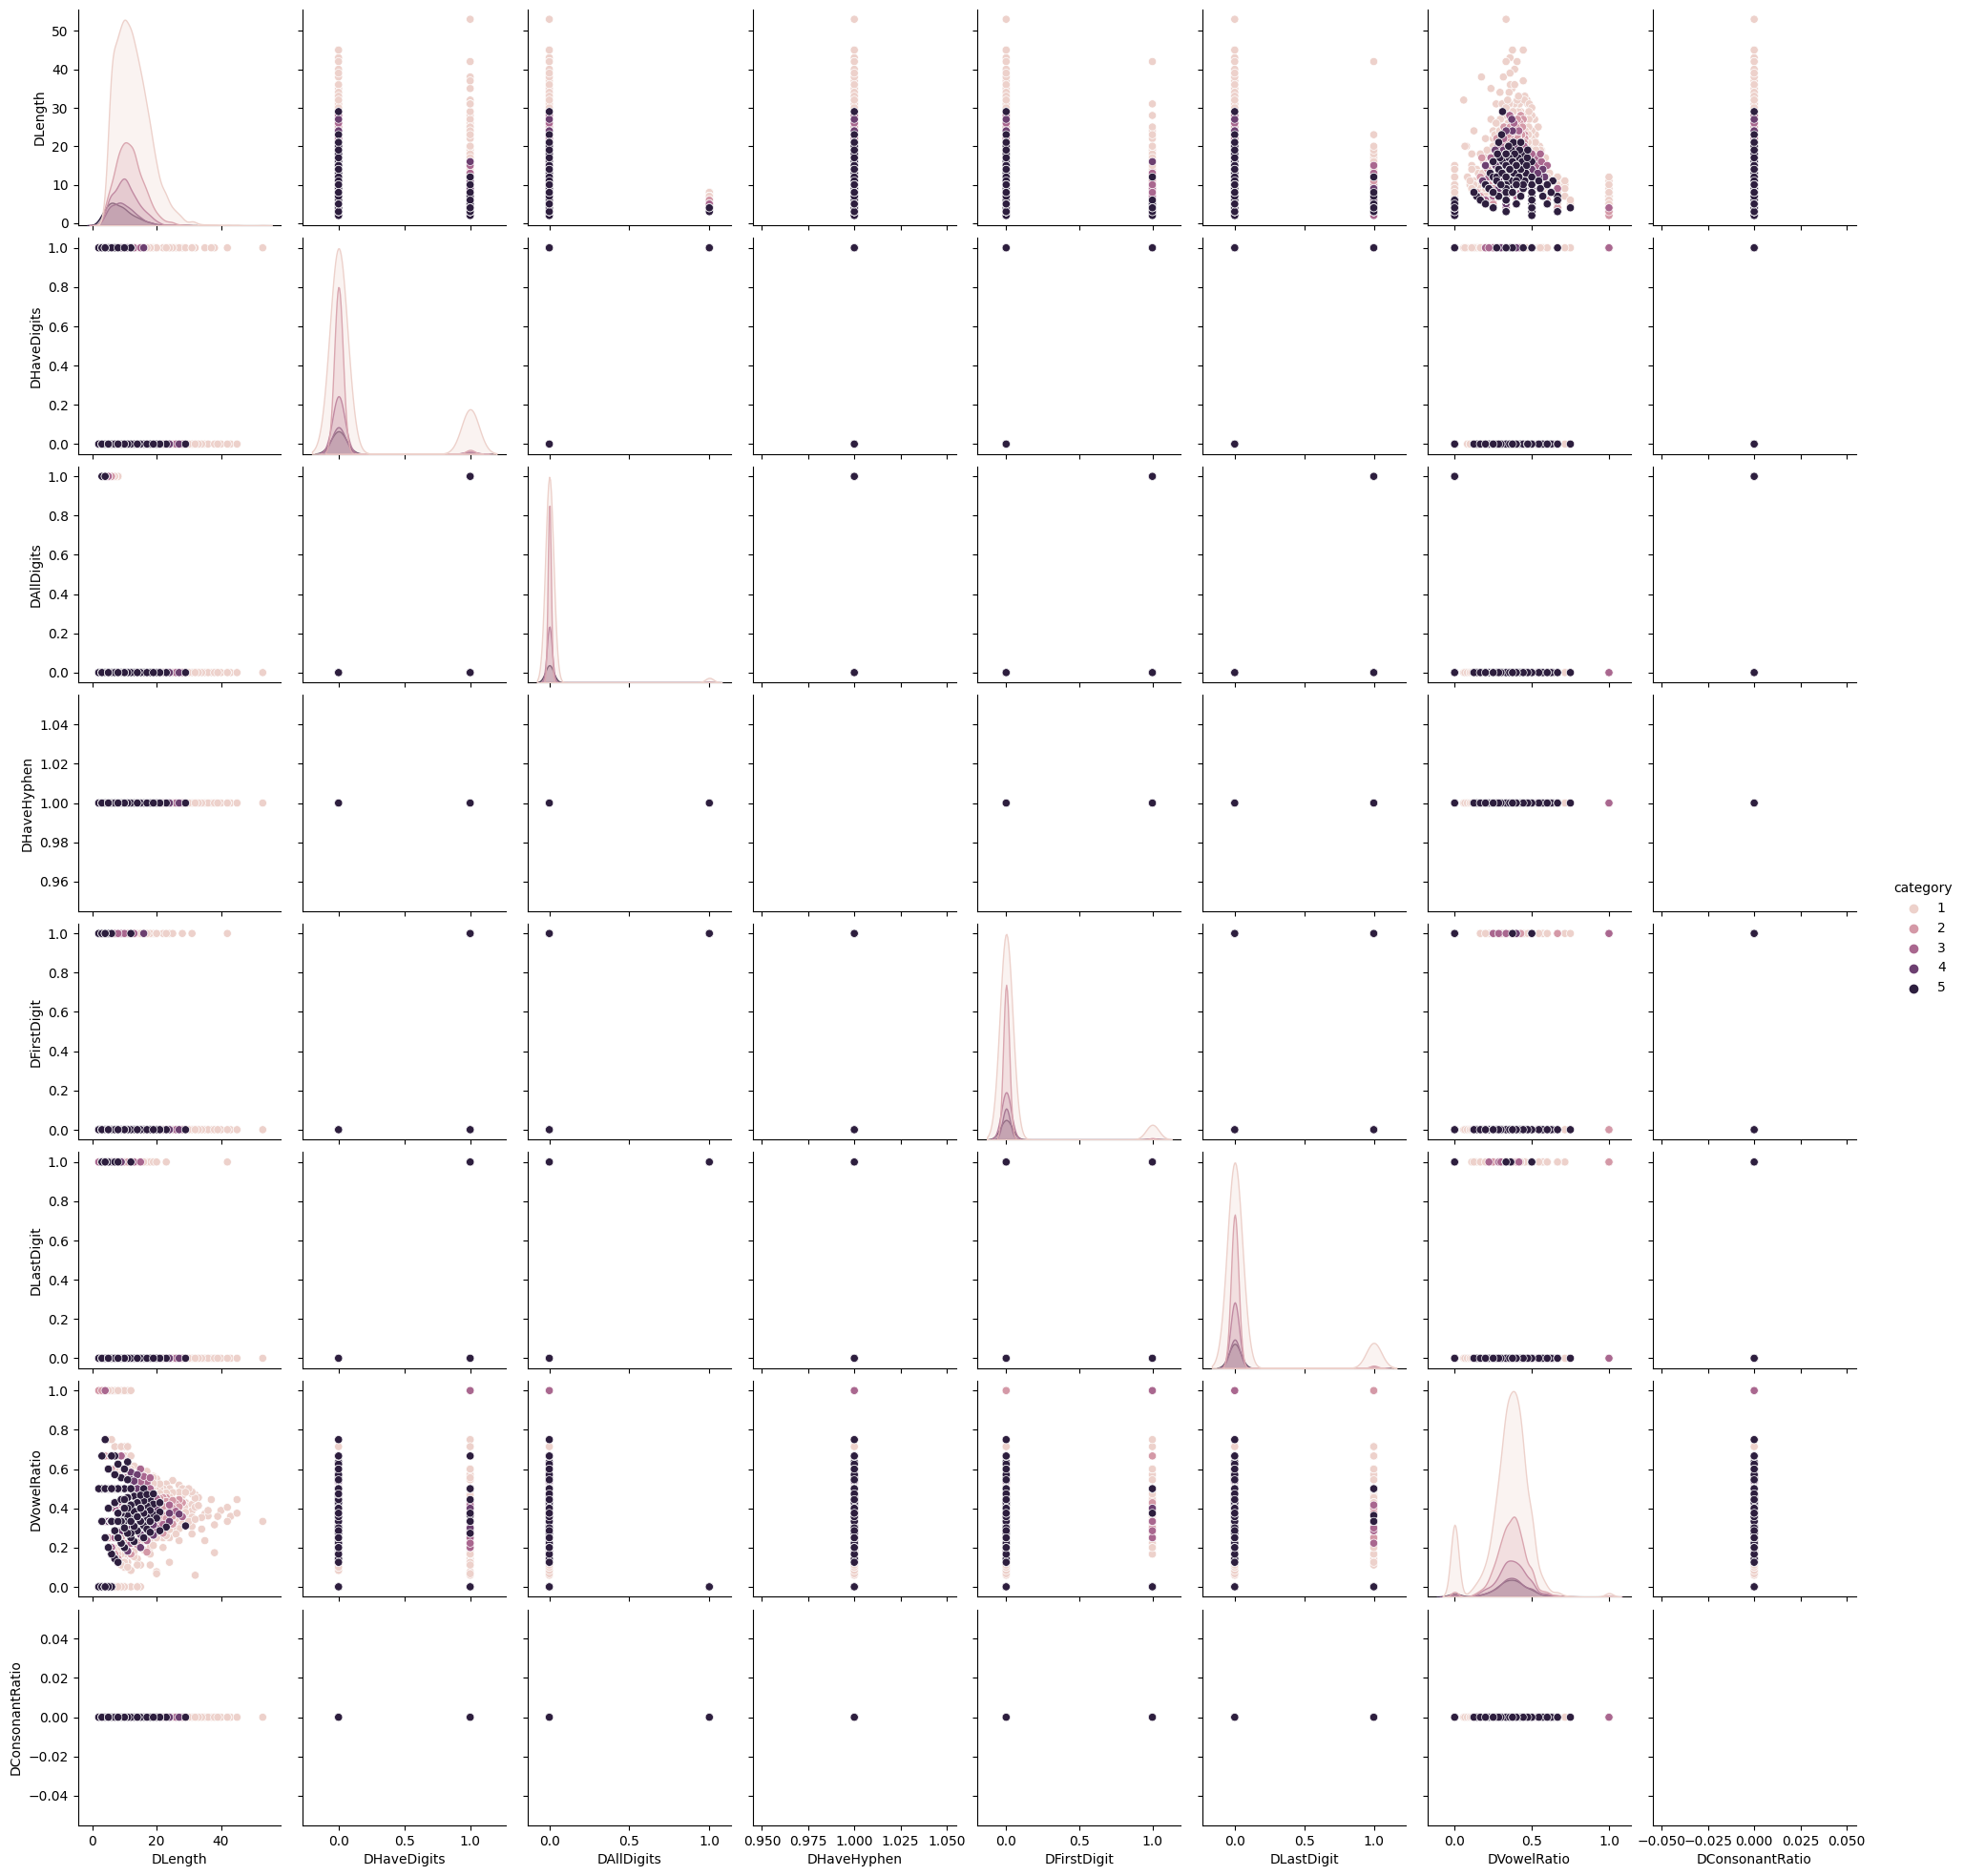

In [9]:


#sns.pairplot(data = data, vars = ['DLength' ], hue = 'category')

#############################################
# Show pairplot for all features (5 marks)
#############################################

sns.pairplot(data = data, vars = ['DLength', 'DHaveDigits', 'DAllDigits', 'DHaveHyphen',
                  'DFirstDigit','DLastDigit', 'DVowelRatio', 'DConsonantRatio'], hue = 'category')

In [10]:

# splitting the data into dependent and independent variables
y = data['category']
X = data[col_Features]


X = X.replace({False: 0, True: 1})  ######################################### IMP TO Replace T/F into 1/0


## **Model Building**

In [11]:


pd.set_option('display.max_columns', None)
X.head(10)

# splitting the dataset
train_x, val_x, train_y, val_y = train_test_split(X, y, test_size = 0.1, random_state = 0, stratify = y)
train_x.shape, val_x.shape




((9000, 8), (1000, 8))

In [12]:
# scaling the data using a minmaxscaler as we have some negative values in our PCA features


scaler = MMS(feature_range=(0, 1))
scaled_train_x = scaler.fit_transform(train_x)
scaled_val_x = scaler.transform(val_x)




### **TREE**

The precision using Decision Trees  is 0.5780366737963174
The recall using Decision Trees  is 0.298
The accuracy score using Decision Trees  is 0.298
The F1 score using Decision Trees is 0.3559179377204549 



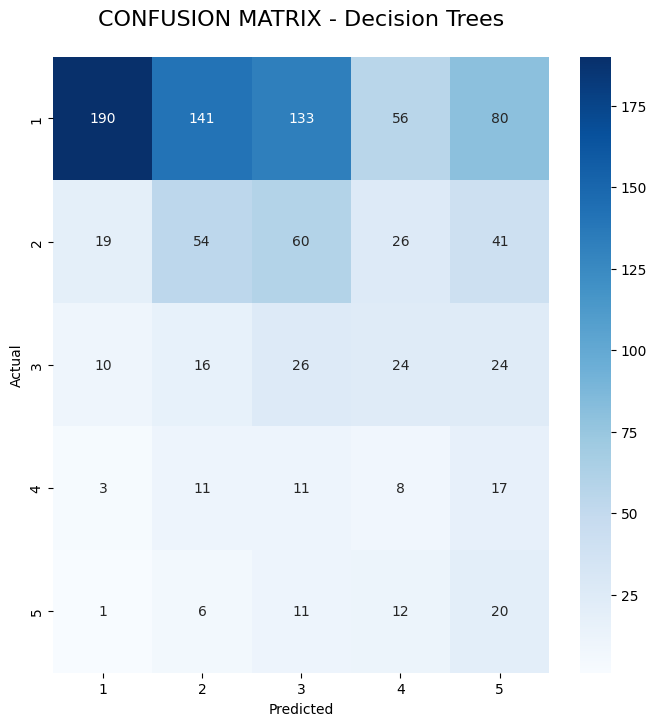

In [13]:
dtc = DTC(criterion = 'gini', splitter = 'random', class_weight='balanced')  # We might need to change this
dtc.fit(scaled_train_x, train_y)
pred_y = dtc.predict(scaled_val_x)

print('The precision using Decision Trees  is', precision_score(val_y, pred_y, average = 'weighted'))
print('The recall using Decision Trees  is', recall_score(val_y, pred_y, average = 'weighted'))
print('The accuracy score using Decision Trees  is', accuracy_score(val_y, pred_y))
print('The F1 score using Decision Trees is', f1_score(val_y, pred_y, average = 'weighted'), '\n')
confusion_matrix(val_y, pred_y)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(confusion_matrix(val_y, pred_y), annot = True, cmap = "Blues", fmt = 'd', xticklabels = [1, 2, 3, 4, 5], yticklabels = [1, 2, 3, 4, 5])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - Decision Trees\n", size = 16);


######################################################
# Add another classifier and shows results (10 marks)
######################################################




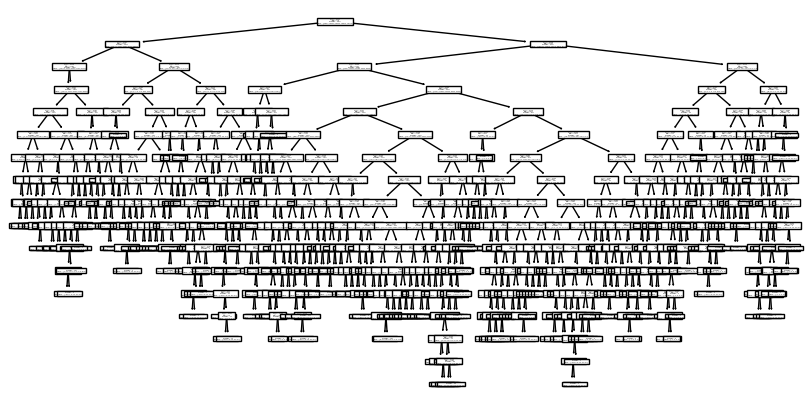

In [14]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 5))
plot_tree(dtc)
plt.show()